# Ch3 pandas

In [ ]:
import numpy as np
import pandas as pd

...

In [ ]:
population_dict={"California":38332521,
                "Texas":26448193,
                "New York":19651127,
                "Florida":19552860,
                "Illinois":12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

### The pandas dataframe object

In [ ]:
# dataframe as generalized np array

# construct new series
area_dict = {"California":423967,
            "Texas":695662,
            "New York":141297,
            "Florida":170312,
            "Illinois":149995}
area=pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [ ]:
# construct 2d object
states = pd.DataFrame({"population":population,
                      "area":area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [ ]:
# index attribute
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [ ]:
# columns attribute
states.columns

Index(['population', 'area'], dtype='object')

In [ ]:
# DataFrame as generalization of dict
# "area" attribute mapped to Series object
states["area"]

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [ ]:
# construct pandas df

# from series
# df is collection of series objects
# single column df
pd.DataFrame(population, columns=["population"])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [ ]:
# list comprehension
data =[{"a":i, "b":2*i} for i in range(3)] # second column is 2* the first
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [ ]:
# pd fills missing keys in dict with NaN
pd.DataFrame([{"a":1, "b":2}, {"b":3, "c":4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [ ]:
# df from dict of Series
pd.DataFrame({"population":population,
             "area":area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [ ]:
# from 2d np array
pd.DataFrame(np.random.rand(3, 2),
            columns=["foo", "bar"],
            index=["a", "b", "c"])

,foo,bar
a,0.430726,0.175420
b,0.762667,0.857707
c,0.692559,0.558000


In [ ]:
# from np structured array
A = np.zeros(3, dtype=[("A", "i8"), ("B", "f8")])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [ ]:
# construct pd df
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


## Pandas Index

In [ ]:
# construct Index from list of integers
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [ ]:
# index as immutable array
ind[1]

3

In [ ]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [ ]:
# index attributes similar to np arrays
print(ind.size, ind.shape , ind.ndim , ind.dtype)

5 (5,) 1 int64


In [ ]:
# however in Index obj are immutable
# ind[1] = 0

In [ ]:
# Index as ordered set
# similar to built-in set data structure
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

# set intersection
indA & indB 

C:\Users\chris\AppData\Local\Temp/ipykernel_10040/1104594289.py:7: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  indA & indB


Int64Index([3, 5, 7], dtype='int64')

In [ ]:
# alternatively
indA.intersection(indB)

Int64Index([3, 5, 7], dtype='int64')

In [ ]:
# union
indA | indB

C:\Users\chris\AppData\Local\Temp/ipykernel_10040/1542985418.py:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  indA | indB


Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [ ]:
# symmetric difference (<>intersection - noncommon elements)
indA ^ indB

C:\Users\chris\AppData\Local\Temp/ipykernel_10040/644459774.py:2: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead
  indA ^ indB


Int64Index([1, 2, 9, 11], dtype='int64')

## Data Indexing and Selection

### Data Selection in Series

In [ ]:
# create Series
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                index =["a", "b", "c", "d"])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [ ]:
# index
data["b"]

0.5

In [ ]:
# dict like expressions and methods
"a" in data

True

In [ ]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [ ]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [ ]:
# "extend" Series by assigning to new index
data["e"] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [ ]:
# slicing, masking & fancy indexing np style
# explicit index
data["a":"c"]

a    0.25
b    0.50
c    0.75
dtype: float64

In [ ]:
# slicing implicit index
data[0:2]

a    0.25
b    0.50
dtype: float64

In [ ]:
# masking (filtering)
data[(data>0.3) & (data<0.8)]

b    0.50
c    0.75
dtype: float64

In [ ]:
# fancy indexing
data[["a", "e"]]

a    0.25
e    1.25
dtype: float64

In [ ]:
# loc, iloc, ix (indexing attributes)
# create Series
data = pd.Series(["a", "b", "c"], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [ ]:
# explicit index when indexing
data[1]

'a'

In [ ]:
# implicit (numerical) index used when slicing
data[1:3]

3    b
5    c
dtype: object

In [ ]:
# loc attribute-->explicit index
data.loc[1]

'a'

In [ ]:
data.loc[1:3]

1    a
3    b
dtype: object

In [ ]:
# iloc attribute-->implicit index
data.iloc[1]

'b'

In [ ]:
data.iloc[1:3]

3    b
5    c
dtype: object

In [ ]:
# ix: hybrid of .loc and .iloc

# "explicit is better than implicit"

### Data Selection in DataFrame

In [ ]:
area = pd.Series({"California":423967,
            "Texas":695662,
            "New York":141297,
            "Florida":170312,
            "Illinois":149995})

pop = pd.Series({"California":38332521,
                "Texas":26448193,
                "New York":19651127,
                "Florida":19552860,
                "Illinois":12882135})
data=pd.DataFrame({"area": area, "pop":pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [ ]:
# dict style access: 
data["area"]

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [ ]:
# attribute style access:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [ ]:
# accesses same obje
data.area is data["area"]

True

In [ ]:
# attr style access conflict with df method
data.pop is data["pop"]

False

In [ ]:
data.pop

<bound method DataFrame.pop of               area       pop
California  423967  38332521
Texas       695662  26448193
New York    141297  19651127
Florida     170312  19552860
Illinois    149995  12882135>

In [ ]:
# column assignment does not work with attr

In [ ]:
# add new column with dict style access:
data["density"] = data["pop"]/data["area"]
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
# df as 2d array
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [ ]:
# transpose df like array
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [ ]:
data.values[0] # accesses row in array

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [ ]:
data["area"] # accesses column in df

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [ ]:
data.iloc[:3, :2] # index underlying arrray as simple np array

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [ ]:
data.loc[:"Illinois", :"pop"]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [ ]:
# ix is hybrid
# data.ix[:3, :"pop"]

In [ ]:
# combimne masking and fancy indexing
data.loc[data.density>100, ["pop", "density"]]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [ ]:
# set or modify val with indexing
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
# indexing refers to cols, slicing to rows
data["Florida":"Illinois"] # only florida returns error

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
# refer to rows by number
data[1:3]

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


In [ ]:
# masking operations are interpreted row-wise
data[data.density>100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


## Operating on Data in Pandas

### UFuncs: Index Alignment

In [ ]:
# Series
area = pd.Series({"Alaska": 1723337,
                 "Texas": 695662,
                 "California": 423967}, name="area")

population = pd.Series({"California": 38332521,
                       "Texas": 26448193,
                       "New York": 19651127}, name="population")

population/area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [ ]:
# indices are union - values from both Series indexes
area.index | population.index

# NaN for missing data

C:\Users\chris\AppData\Local\Temp/ipykernel_10040/3003246782.py:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  area.index | population.index


Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [ ]:
# missing values filled with NaN by default
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A+B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [ ]:
# Equivalent to A+B but with optional explicit specification of fill value
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [ ]:
# define different dim dfs to chekc alignment

rng = np.random.RandomState(0)

A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                columns=list("AB"))
A

,A,B
0,12,15
1,0,3


In [ ]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                columns=list("BAC"))
B

,B,A,C
0,3,7,9
1,3,5,2
2,4,7,6


In [ ]:
A+B
# aligned correctly

,A,B,C
0,19.0,18.0,NaN
1,5.0,6.0,NaN
2,NaN,NaN,NaN


In [ ]:
# fill NaN with mean of all values of A
# do this by first stacking rows of A
fill = A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,19.0,18.0,16.5
1,5.0,6.0,9.5
2,14.5,11.5,13.5


## Operation between DataFrame and Series

In [ ]:
# index alignment maintained

A = rng.randint(10, size=(3, 4))
A

array([[8, 8, 1, 6],
       [7, 7, 8, 1],
       [5, 9, 8, 9]])

In [ ]:
# subtract first row from all other rows
# row-wise
A-A[0]

array([[ 0,  0,  0,  0],
       [-1, -1,  7, -5],
       [-3,  1,  7,  3]])

In [ ]:
# similarly in pd
df = pd.DataFrame(A, columns=list("QRST"))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-1,7,-5
2,-3,1,7,3


In [ ]:
# column-wise with obj methods
df.subtract(df["R"], axis=0)

,Q,R,S,T
0,0,0,-7,-2
1,0,0,1,-6
2,-4,0,-1,0


In [ ]:
# auto align indices
halfrow = df.iloc[0, ::2]
halfrow

Q    8
S    1
Name: 0, dtype: int32

In [ ]:
df-halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,7.0,NaN
2,-3.0,NaN,7.0,NaN


## Handling missing data

In [ ]:
import numpy as np
import pandas as pd

# None missing type is a python missing sentinel value
# None missing type only possible with arrays of type object
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [ ]:
# operations howver are done at python level - much less efficient
for dtype in ["object", "int"]: # much faster for int
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
84 ms ± 12.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
1.96 ms ± 31.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



In [ ]:
# also not possible to aggregate across array with None type
# vals1.sum()

In [ ]:
# NaN is more universal missing sentinel value
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

In [ ]:
# all operation with NaN result in NaN:
1 + np.nan

nan

In [ ]:
0 * np.nan

nan

In [ ]:
# aggregates are defined
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [ ]:
# special np aggr that ignore nans
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

In [ ]:
# None and nans are used interchangeably in pandas
# pd converts where needed
pd.Series([1, np.nan, 3, None])

0    1.0
1    NaN
2    3.0
3    NaN
dtype: float64

In [ ]:
# when specifying nans for non-floating types, pandas automatically upcasts
x = pd.Series(range(2), dtype=int)

x[0] = None # automatically converted to nan
x

0    NaN
1    1.0
dtype: float64

## Operating on Null Values

In [ ]:
# 4 methods for working with nulls in pd:
# isnull()
# notnull()
# dropna()
# fillna()

data = pd.Series([1, np.nan, "hello", None])
data.isnull() # returns boolean mask (Series with boolean values)

0    False
1     True
2    False
3     True
dtype: bool

In [ ]:
# boolean masks can be directly used as index
data[data.notnull()] # returns only non-null values

0        1
2    hello
dtype: object

### Dropping null values

In [ ]:
# dropping na - Series
data.dropna()

0        1
2    hello
dtype: object

In [ ]:
# drop na - df
df = pd.DataFrame([[1, np.nan, 2],#
                 [2, 3, 5],
                 [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [ ]:
# by default, dropna removes all rows with any null value - even just one
df.dropna()

,0,1,2
1,2.0,3.0,5


In [ ]:
# drop na across different axis
df.dropna(axis="columns")

,2
0,2
1,5
2,6


In [ ]:
# by default, dropna drops row or col that has any nan
# this can be adjusted

# adding new col with nan values
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [ ]:
# only removes cols that have only nans
df.dropna(axis="columns", how="all")

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [ ]:
# thresh parameter specifies minimum number of NON-NULL values for the row/col kept
df.dropna(axis="rows", thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


### Filling null values

In [ ]:
# define series
data = pd.Series([1, np.nan, 2, None, 3], index=list("abcde"))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [ ]:
# fill na with 0
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [ ]:
# forward-fill -- propagate previous value forward
data.fillna(method="ffill")

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [ ]:
# back-fill
data.fillna(method="bfill")

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [ ]:
# similarly for df, possible to specify axis
df.fillna(method="ffill", axis=1) # if prev value not available, NA remains

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


## A Multiply Indexed Series

In [ ]:
import numpy as np
import pandas as pd

### The bad way

In [ ]:
# represent multidimensional data with python tuples as index
index = [("California", 2000),
        ("California", 2010),
        ("New York", 2000),
        ("New York", 2010),
        ("Texas", 2000),
        ("Texas", 2010)]

populations = [33871648,
              37253956,
              18976451,
              19378102,
              20851820,
              25145561]

pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976451
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [ ]:
# index based on this multiple index
pop[("California", 2010):("Texas", 2000)]

(California, 2010)    37253956
(New York, 2000)      18976451
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [ ]:
# however selecting e.g. 2010 is inefficient
pop[[i for i in pop.index if i[1]==2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

### The better way: Pandas MultiIndex

In [ ]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [ ]:
# reindex
pop = pop.reindex(index)
pop
# hierarchical representation visible

California  2000    33871648
            2010    37253956
New York    2000    18976451
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
pop[:, 2010] # result is single indexed array

California    37253956
New York      19378102
Texas         25145561
dtype: int64

### MultiIndex as extra dimension

In [ ]:
# converting multiply-indexed Series into indexed df
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976451,19378102
Texas,20851820,25145561


In [ ]:
# and reverse
pop_df.unstack()

2000  California    33871648
      New York      18976451
      Texas         20851820
2010  California    37253956
      New York      19378102
      Texas         25145561
dtype: int64

In [ ]:
# each extra level in multi index represents extra dimension of data
pop_df = pd.DataFrame({"total":pop,
                      "under18": [9267098, 9284094, 4687374, 7318033,5903301,6879014]})
pop_df

total  under18
California 2000  33871648  9267098
           2010  37253956  9284094
New York   2000  18976451  4687374
           2010  19378102  7318033
Texas      2000  20851820  5903301
           2010  25145561  6879014

In [ ]:
# calcs work as well
f_u18 = pop_df["under18"]/pop_df["total"]
f_u18.unstack()

,2000,2010
California,0.273595,0.249211
New York,0.247010,0.377644
Texas,0.283107,0.273568


## Methods of Multiindex Creation
page 131

In [ ]:
# pass list of two or more index arrays
df = pd.DataFrame(np.random.rand(4, 2),
                 index=[["a", "a", "b", "b"], [1, 2, 1, 2]],
                 columns=["data1", "data2"])
df

data1     data2
a 1  0.098624  0.838442
  2  0.831669  0.554238
b 1  0.917641  0.637527
  2  0.876146  0.029734

In [ ]:
# dict with tuples as keys-->MultiIndex
pd.Series({("California", 2000):33871648,
          ("California", 2010): 23434535,
          ("Texas", 2000): 3453543453,
          ("Texas", 2010): 345345435,
          ("New York", 2000): 7864633,
          ("New York", 2010): 34532523})

California  2000      33871648
            2010      23434535
Texas       2000    3453543453
            2010     345345435
New York    2000       7864633
            2010      34532523
dtype: int64

### Explicit Multiindex constructors

In [ ]:
# from list of arrays
pd.MultiIndex.from_arrays([["a", "a", "b", "b"], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [ ]:
# from list of tuples
pd.MultiIndex.from_tuples([("a", 1), ("a", 2), ("b", 1) , ("b", 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [ ]:
# from Cartesian product of single indices
pd.MultiIndex.from_product([["a", "b"], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [ ]:
# internal encoding of constructor
pd.MultiIndex(levels=[["a", "b"], [1, 2]],
             codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

### MultiIndex level names

In [ ]:
# names argument in constructor
# OR names attribut of index
pop.index.names = ["state", "year"]
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976451
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### MultiIndex for columns

In [ ]:
# hierachical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                  names=["year", "visit"])
columns = pd.MultiIndex.from_product([["Bob", "Guido", "Sue"], ["HR", "Temp"]],names=["subject", "type"])

# mock data
data = np.round(np.random.rand(4, 6), 1)
data[:, ::2]*=10
data+=37

# create the df
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      43.0  38.0  40.0  37.5  39.0  37.1
     2      40.0  37.6  38.0  37.7  46.0  37.1
2014 1      38.0  37.1  42.0  37.7  40.0  37.6
     2      39.0  37.6  44.0  37.4  44.0  37.7

In [ ]:
# indexing for name returns full df with just that persons info
health_data["Guido"]

type          HR  Temp
year visit            
2013 1      40.0  37.5
     2      38.0  37.7
2014 1      42.0  37.7
     2      44.0  37.4

## Indexing and Slicing a MultiIndex

### Multiply Indexed Series

In [ ]:
# df
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976451
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
# indixing with multiple terms
pop["California", 2000]

33871648

In [ ]:
# partial indexing
pop["California"]

year
2000    33871648
2010    37253956
dtype: int64

In [ ]:
# partial slicing possible if MultiIndex sorted
pop.loc["California": "New York"]

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976451
            2010    19378102
dtype: int64

In [ ]:
# partial indexing
pop[:, 2000]

state
California    33871648
New York      18976451
Texas         20851820
dtype: int64

In [ ]:
# selection with boolean mask
pop[pop>22000000] # checks all values

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [ ]:
# "fancy" indexing
pop[["California", "Texas"]]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

### Multiply Indexed DataFrames

In [ ]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      43.0  38.0  40.0  37.5  39.0  37.1
     2      40.0  37.6  38.0  37.7  46.0  37.1
2014 1      38.0  37.1  42.0  37.7  40.0  37.6
     2      39.0  37.6  44.0  37.4  44.0  37.7

In [ ]:
# columns are primary in DataFrame
health_data["Guido", "HR"]

year  visit
2013  1        40.0
      2        38.0
2014  1        42.0
      2        44.0
Name: (Guido, HR), dtype: float64

In [ ]:
# loc, iloc, ix
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      43.0  38.0
     2      40.0  37.6

In [ ]:
# with loc and tuple of indices
health_data.loc[:, ("Bob", "HR")]

year  visit
2013  1        43.0
      2        40.0
2014  1        38.0
      2        39.0
Name: (Bob, HR), dtype: float64

In [ ]:
# slice with tuple returns error
# health_data.loc[(:, 1), (:, "HR")]

In [ ]:
# fix this with IndexSlice obj
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, "HR"]]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,43.0,40.0,39.0
2014,1,38.0,42.0,40.0


## Rearranging Multi-Indices
### Sorted and unsorted indices

In [ ]:
# creating multiply indexed data with unsorted indces
index = pd.MultiIndex.from_product([["a", "c", "b"], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)

# naming indices
data.index.names = ["char", "int"]

data

char  int
a     1      0.470420
      2      0.790769
c     1      0.430796
      2      0.339977
b     1      0.889388
      2      0.937169
dtype: float64

In [ ]:
# partial slice will return error
try:
    data["a", "b"]
except KeyError as e:
    print(type(e))
    print(e)

<class 'KeyError'>
('a', 'b')


In [ ]:
# sort index to resolve this
data = data.sort_index()
data

char  int
a     1      0.470420
      2      0.790769
b     1      0.889388
      2      0.937169
c     1      0.430796
      2      0.339977
dtype: float64

In [ ]:
# now partial slicing works
data["a": "b"]

char  int
a     1      0.470420
      2      0.790769
b     1      0.889388
      2      0.937169
dtype: float64

### Stacking and unstacking indices

In [ ]:
# convert from stacked multiindex dataset to simple 2-d
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976451,20851820
2010,37253956,19378102,25145561


In [ ]:
# on different level
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976451,19378102
Texas,20851820,25145561


In [ ]:
# recover original series
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976451
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### Index setting and resetting

In [ ]:
# result: df with state and year col
pop_flat = pop.reset_index(name="population")
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976451
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [ ]:
# * build MultiIndex from column values
# pop_flat.set_index(["state", "year"]) # specify columns to be converted to MI

### Data Aggregations on Multi-Indices

In [ ]:
# naming index level to explore
data_mean = health_data.mean(level="year") # level replaced by groupby
data_mean

C:\Users\chris\AppData\Local\Temp/ipykernel_10040/3378276589.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  data_mean = health_data.mean(level="year") # level replaced by groupby


subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     41.5  37.80  39.0  37.60  42.5  37.10
2014     38.5  37.35  43.0  37.55  42.0  37.65

In [ ]:
# aggr along col
data_mean.mean(axis=1, level="type")

C:\Users\chris\AppData\Local\Temp/ipykernel_10040/720554110.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  data_mean.mean(axis=1, level="type")


type,HR,Temp
year,,
2013,41.000000,37.500000
2014,41.166667,37.516667


## Combining Datasets - Concat & Append

In [ ]:
import numpy as np
import pandas as pd

# convenience function to create df
def make_df(cols, ind):
    """Quickly make a df"""
    data = {c:[str(c) + str(i) for i in ind]
           for c in cols}
    return pd.DataFrame(data, ind)

make_df("ABC", range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [ ]:
# concatenation of np arrays into single arrray
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# also with axis keyword
x = [[1, 2], [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

In [ ]:
# simple concatenation with pd.concat - takes list or tuple as arg
ser1 = pd.Series(["A", "B", "C"], index=[1, 2, 3])
ser2 = pd.Series(["D", "E", "F"], index=[4, 5, 6])

pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [ ]:
df1 = make_df("AB", [1, 2])
df2 = make_df("AB", [3, 4])
print(df1)
print(df2)
print(pd.concat([df1, df2])) # by default row-wise(axis=0)

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [ ]:
df3 = make_df("AB", [0, 1])
df4 = make_df("CD", [0, 1])
print(df3)
print(df4)
print(pd.concat([df3, df4], axis="columns"))

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


### Duplicate indices

In [ ]:
# pd.concat preserves indices, even duplicate ones
x = make_df("AB", [0, 1])
y = make_df("AB", [2, 3])

y.index = x.index # duplicate indices
print(x)
print(y)
print(pd.concat([x, y]))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


In [ ]:
# handling duplicate indices
# throwing an error
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


In [ ]:
# ignoring duplicate indices
print(x)
print(y)
print(pd.concat([x, y], ignore_index=True))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


In [ ]:
# specify MultiIndex key
print(x)
print(y)
print(pd.concat([x, y], keys=["x", "y"]))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


### concatenation with joins

In [ ]:
df5 = make_df("ABC", [1, 2])
df6 = make_df("BCD", [3, 4])
print(df5)
print(df6)
print(pd.concat([df5, df6]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


In [ ]:
# changing default outer join (union) to inner
print(df5)
print(df6)
print(pd.concat([df5, df6], join="inner")) # keeps only common columns

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


In [ ]:
print(df5)
print(df6)
print(pd.concat([df5, df6], join_axes=[df5.columns]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4


TypeError: concat() got an unexpected keyword argument 'join_axes'

In [ ]:
# with append() method
df1.append(df2) # does not modify original object

## Combining datasets: Merge and Join

In [ ]:
# one-to-one joins
df1 = pd.DataFrame({"employee": ["Bob", "Jake", "Lisa", "Sue"],
                   "group": ["Accounting", "Engineering", "Engineering", "HR"]})
df2 = pd.DataFrame({"employee": ["Lisa", "Bob", "Jake", "Sue"],
                   "hire_date": [2004, 2008, 2012, 2014]})
print(df1)
print(df2)

In [ ]:
# combine into single DataFrame
df3 = pd.merge(df1, df2)
df3

In [ ]:
# many-to-one joins
df4 = pd.DataFrame({"group":["Accounting", "Engineering", "HR"],
                   "supervisor": ["Carly", "Guido", "Steve"]})
print(df3)
print(df4)
print(pd.merge(df3, df4))

In [ ]:
df5 = pd.DataFrame({"group": ["Accounting", "Accounting", "Engineering", "Engineering", "HR", "HR"],
                   "skills": ["math", "spreadsheets", "coding", "linux", "spreadsheets", "organization"]})
print(df1)
print(df5)
print(pd.merge(df1, df5)) # kind of multiplies keys on key col -- e.g. engineering appears 2x2 = 4 times in end column

### Specification of merge key

In [ ]:
# on
print(df1)
print(df2)
print(pd.merge(df1, df2, on="employee"))

In [ ]:
# left_on, right_on
df3 = pd.DataFrame({"name": ["Bob", "Jake", "Lisa", "Sue"],
                   "salary": [70000, 80000, 120000, 90000]})
print(df1)
print(df3)
print(pd.merge(df1, df3, left_on="employee", right_on="name").drop("name", axis=1)) # dropping redundant name col after merging

In [ ]:
# merging on index

# setting employee col as index
df1a = df1.set_index("employee")
df2a = df2.set_index("employee")
print(df1a)
print(df2a)

In [ ]:
print(df1a)
print(df2a)
print(pd.merge(df1a, df2a, left_index=True, right_index=True))

In [ ]:
# shortcut
print(df1a)
print(df2a)
print(df1.join(df2a))

In [ ]:
# mixing indices with columns for merging
print(df1a)
print(df3)
print(pd.merge(df1a, df3, left_index=True, right_on="name"))

In [ ]:
# specifying type of join
df6 = pd.DataFrame({"name": ["Peter", "Paul", "Mary"],
                   "food": ["fish", "beans", "bread"]}
#                    , columns=["name", "food"]
                  )
df7 = pd.DataFrame({"name": ["Mary", "Joseph"],
                   "drink": ["wine", "beer"]}
#                   , columns=["name", "drink"]
                  )
print(df6)
print(df7)
print(pd.merge(df6, df7, how="inner")) # default

In [ ]:
print(df6)
print(df7)
print(pd.merge(df6, df7, how="left")) # default

## Overlapping column names - suffixes keyword

In [ ]:
# duplicate column names
df8 = pd.DataFrame({"name": ["Bob", "Jake", "Lisa", "Sue"],
                   "rank": [1, 2, 3, 4]})
df9 = pd.DataFrame({"name": ["Bob", "Jake", "Lisa", "Sue"],
                   "rank":[3, 1, 4, 2]})
print(df8)
print(df9)
print(pd.merge(df8, df9, on="name"))

In [ ]:
# defining suffix for dupl cols
print(pd.merge(df8, df9, on="name", suffixes=["_L", "_R"]))

## US states data

In [ ]:
pop = pd.read_csv("https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/state-population.csv")
areas = pd.read_csv("https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/state-areas.csv")
abbrevs = pd.read_csv("https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/state-abbrevs.csv")

print(pop.head())
print(areas.head())
print(abbrevs.head())

In [ ]:
merged = pd.merge(pop, abbrevs, how="outer",
                 left_on="state/region", right_on="abbreviation")
merged.drop("abbreviation", axis=1, inplace=True)
merged.head()

In [ ]:
# check for mismatches by looking for rows with nulls
merged.isnull().any()

In [ ]:
merged[merged["population"].isnull()].head()

In [ ]:
# entries lacking abbrev
merged.loc[merged["state"].isnull(), "state/region"].unique()

In [ ]:
# filling in missing entry keys
merged.loc[merged["state/region"] == "PR", "state"] = "Puerto Rico"
merged.loc[merged["state/region"] == "USA", "state"] = "United States"
merged.isnull().any()

In [ ]:
# merge result with area data
# join on state column
final = pd.merge(merged, areas, on="state", how="left")
final.head()

In [ ]:
final.isnull().any()

In [ ]:
final["state"][final["area (sq. mi)"].isnull()].unique()

In [ ]:
# simply dropping as population density of US not relevant
final.dropna(inplace=True)
final.head()

In [ ]:
# select porting of data corresponding to year 2000 and total pop
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

In [ ]:
data2010.head()

In [ ]:
# reindex data
data2010.set_index(data2010["state"], inplace=True) # setting state col as index
density = data2010["population"] / data2010["area (sq. mi)"] # calc pop density
# automatically setting state as index

density.sort_values(ascending=False, inplace=True)
density.head() # residents per sq.mile

In [ ]:
# least densely populated states and regions
density.tail()

## Aggregation and grouping

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# using planets data from Seaborn
import seaborn as sns
planets = sns.load_dataset("planets")
planets.shape

(1035, 6)

In [ ]:
# aggregates for Series return single values
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [ ]:
ser.sum()

2.811925491708157

In [ ]:
ser.mean()

0.5623850983416314

In [ ]:
# for df aggregates return results within each column
df = pd.DataFrame({"A":rng.rand(5),
                  "B": rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [ ]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [ ]:
# aggregate by row instead of col with axis arg
df.mean(axis="columns")

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [ ]:
# convenience method .describe() computes several common aggregates for each column
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [ ]:
df.count()

A    5
B    5
dtype: int64

In [ ]:
df.mad()

A    0.296679
B    0.366205
dtype: float64

### Groupby: Split, Apply, Combine

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Group by: Split, Apply, Combine
# Split: breaking up and grouping df
# Apply
# Combine

In [ ]:
df = pd.DataFrame({"key": ["A", "B", "C", "A", "B", "C"],
                  "data": range(6)})
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [ ]:
df.groupby("key") # no result until aggregate  function is applied

In [ ]:
df.groupby("key").sum()

,data
key,
A,3
B,5
C,7


In [ ]:
# column indexing with groupby object
# returns modified groupby object
# by specific column
planets.groupby('method')["orbital_period"].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [ ]:
# iteration over groups in GroupBy objects
# each group is Series
for (method, group) in planets.groupby("method"):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [ ]:
# "displatch" methods on groups
planets.groupby("method")["year"].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

In [ ]:
# operations before combining grouped data

# create df
rng = np.random.RandomState(0)
df = pd.DataFrame({"key": ["A", "B", "C", "A", "B", "C"],
                  "data1": range(6),
                  "data2": rng.randint(0, 10, 6)},
                  columns=["key", "data1", "data2"])
# aggregation
df.groupby("key").aggregate(["min", np.median, max]) # 3 different ways to define aggergation in .aggregate() method

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [ ]:
# dictionary mapping columns to operations
df.groupby("key").aggregate({"data1": "min",
                            "data2": "max"})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


#### Filtering

Drop data based on group properties

In [ ]:
# define filter func (filter criteria)
def filter_func(x):
    """filtering based on standard deviation threshold
    """
    return x["data2"].std() > 4

print(df)
print(df.groupby("key").std()) # returns standard dev for all numeric cols
print(df.groupby("key").filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


#### Transformation
Output same shape as input.

Example: center data by subtracting group-wise mean:

In [ ]:
df.groupby("key").transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


#### The apply() method
apply arbitrary function to group results

takes df as input, returns df, Ser or scalar

In [ ]:
# define function to apply
def norm_by_data2(x):
    """normalizes first columns by sum of second
    """
    x["data1"] /= x["data2"].sum()
    return x

print(df)
print(df.groupby("key").apply(norm_by_data2))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


#### Specifying the split key

In [ ]:
# A list, array or index with grouping keys
L = [0, 1, 0, 1, 2, 0]

print(df)
print(df.groupby(L).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
   data1  data2
0      7     17
1      4      3
2      4      7


In [ ]:
# dict or Ser mapping index to group
df2 = df.set_index("key")

# dict
mapping = {"A": "vowel", "B": "consonant", "C": "consonant"}

print(df2)
print(df2.groupby(mapping).sum())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
           data1  data2
key                    
consonant     12     19
vowel          3      8


In [ ]:
# py function
print(df2)
print(df2.groupby(str.lower).mean())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
     data1  data2
key              
a      1.5    4.0
b      2.5    3.5
c      3.5    6.0


In [ ]:
# combination of above
# list of keys
# group on multi-index
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
key,key,,
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


In [ ]:
# example: count discovered planets by method and by decade
decade = 10 * (planets["year"] // 10)
decade = decade.astype(str) + "s"
decade.name = "decade"
planets.groupby(["method", decade])["number"].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


In [ ]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


## Pivot Tables
### Motivating Pivot Tables

In [ ]:
# using Titanic dataset
import numpy as np
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# survival rate by gender
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [ ]:
# survival rate by gender, class
titanic.groupby(['sex', 'class'])['survived'].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
# with pivot_table method
titanic.pivot_table('survived', # values
                    index = 'sex',
                    columns = 'class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
# multilevel (index)

# bin values
age = pd.cut(titanic["age"], # x
             [0, 18, 80]) # bins

titanic.pivot_table("survived", ["sex", age], "class") # age w/o "" refers to var defined above

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [ ]:
# multilevel on cols
fare = pd.qcut(titanic["fare"], # x
               2) # how many quantiles
titanic.pivot_table("survived", ["sex", age], [fare, "class"])
#result is 4d aggregation

fare            (-0.001, 14.454]            ... (14.454, 512.329]          
class                      First    Second  ...            Second     Third
sex    age                                  ...                            
female (0, 18]               NaN  1.000000  ...          1.000000  0.318182
       (18, 80]              NaN  0.880000  ...          0.914286  0.391304
male   (0, 18]               NaN  0.000000  ...          0.818182  0.178571
       (18, 80]              0.0  0.098039  ...          0.030303  0.192308

[4 rows x 6 columns]

## Example: Birthrate data

In [46]:
# view raw--> copy url from github
births = pd.read_csv("https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/births.csv")
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [47]:
# adding pivot table
births["decade"] = 10 * (births["year"] // 10)
births.pivot_table("births", index="decade", columns="gender", aggfunc="sum")

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


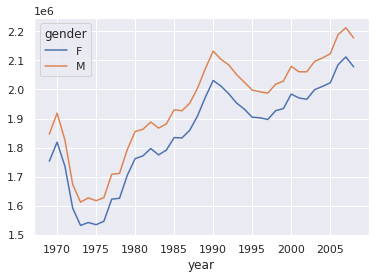

In [48]:
# male births outnumber female births in every decade
# visualize this trend
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
births.pivot_table("births", index="year", columns="gender", aggfunc="sum").plot() # simply use plot method of pd

In [49]:
# further processing: remove outliers (robust sigma-clipping operation)
quartiles = np.percentile(births["births"], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0]) # 0.74 comes from IQR of Gauss.distr.

Text(0, 0.5, 'mean births by day')

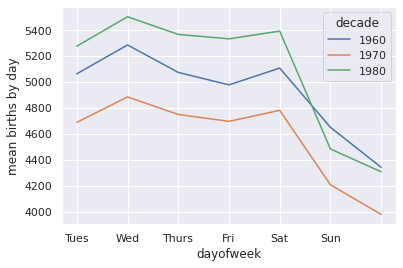

In [52]:
# use query() method to filter out rows outside quart. values
births = births.query("(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)")

# set day col to int (before string due to null)
births["day"] = births["day"].astype(int)

# combine day, month and year to create datetime index
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format = "%Y%m%d")
births["dayofweek"] = births.index.dayofweek

# plot births by weekday for each decade
births.pivot_table("births", index="dayofweek", columns="decade", aggfunc="mean").plot()
plt.gca().set_xticklabels(["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"])
plt.ylabel("mean births by day")

# births slightly less common on weekends

In [54]:
# plot mean no of births by day of year

# group data by mo and day
births_by_date = births.pivot_table("births", [births.index.month, births.index.day]) # MultiIndex
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [55]:
# make plottable by turning months and days into date
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index] # comprehension, using dummy value for year
births_by_date.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


Text(0.5, 1.0, 'Average daily births by date')

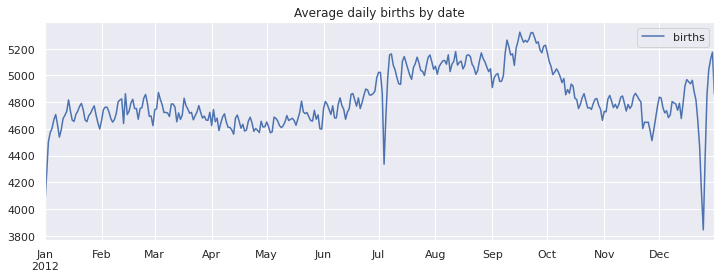

In [59]:
# plot: average daily births by date
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)
plt.title("Average daily births by date")

# noticable dip in birthrates on holidays (e.g. new years day)

## Vectorized String Operations

### Introducing Pandas String Operations

In [1]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2 # vectorized arithmetic operation

array([ 4,  6, 10, 14, 22, 26])

In [4]:
data = ["peter", "Paul", "MARY", "gUIDO"]
[s.capitalize() for s in data] # not so flexible syntax with strings (comprehension)

['Peter', 'Paul', 'Mary', 'Guido']

In [5]:
# also will not work with missing values
data = ["peter", "Paul", None, "MARY", "gUIDO"]
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

In [6]:
# pandas str attributes handles vectorized string operations flexibly (also for missing values)
import pandas as pd
names = pd.Series(data) # convert to ser
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [9]:
# use pd method capitalize
names.str.capitalize() # skip missings

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

In [13]:
names.str

## Tables of Pandas String Methods

In [14]:
# create Series to use in examples
monte = pd.Series(["Graham Chapman", "John Cleese", "Terry Gillian", "Eric Idle", "Terry Jones", "Michael Palin"])

### Methods similar to Python string methods

In [15]:
monte.str.lower() # returns Ser of strings

0    graham chapman
1       john cleese
2     terry gillian
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [16]:
monte.str.len() # returns Ser of numbers

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [17]:
monte.str.startswith("T") # returns bool

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [26]:
monte.str.split() # returns list

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gillian]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

### Methods using regular expressions

In [27]:
# utilizes re module
monte.str.extract("([A-Za-z]+)") # calls re.match on each element, returning matched groups as strings

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


In [28]:
# find all names that start and end with a consonant
monte.str.findall(r'^[^AEIOU].*[^aeiou]$') # ^ : start of string , $ : end of string

0    [Graham Chapman]
1                  []
2     [Terry Gillian]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

### miscellaneous methods

#### vectorized item access and slicing

In [30]:
# vectorized item access and slicing
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [31]:
# equivalent to 
monte.str.slice(0, 3)

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [33]:
# access elements of arrays returned by split()
monte.str.split().str.get(-1) # get last name (first list element from end)

0    Chapman
1     Cleese
2    Gillian
3       Idle
4      Jones
5      Palin
dtype: object

#### indicator variables

In [35]:
full_monte = pd.DataFrame({"name":monte,
                          "info":["B|C|D", "B|D", "A|C", "B|D", "B|C", "B|C|D"]})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gillian,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [37]:
# split out indicator vars into df
full_monte["info"].str.get_dummies("|")

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


### Example: Recipe Database

In [7]:
filepath = "G:\\My Drive\\PDSH\\PythonDataScienceHandbook-master\\notebooks\\data\\recipeitems-latest.json"

try:
    recipes = pd.read_json(filepath)
except ValueError as e:
    print("ValueError:", e) # error as each line itself is a valid json but not the full file

ValueError: Trailing data


In [22]:
with open(filepath, encoding="latin-1") as f:
    line = f.readline()
pd.read_json(line).shape

ValueError: Protocol not known: { "_id" : { "$oid" : "5160756b96cc62079cc2db15" }, "name" : "Drop Biscuits and Sausage Gravy", "ingredients" : "Biscuits\n3 cups All-purpose Flour\n2 Tablespoons Baking Powder\n1/2 teaspoon Salt\n1-1/2 stick (3/4 Cup) Cold Butter, Cut Into Pieces\n1-1/4 cup Butermilk\n SAUSAGE GRAVY\n1 pound Breakfast Sausage, Hot Or Mild\n1/3 cup All-purpose Flour\n4 cups Whole Milk\n1/2 teaspoon Seasoned Salt\n2 teaspoons Black Pepper, More To Taste", "url" : "http

In [18]:
# construct string representation containing all json entries and then load all
with open(filepath, "r", errors="ignore") as f:
    data = (line.strip() for line in f)
    data_json = "[{0}]".format(",".join(data))
recipes = pd.read_json(data_json)

ValueError: Protocol not known:  and do a little sexy twirl?  Such a flirty little thing!\n\n\"Asian Lettuce Wraps\" or \"Asian Lettuce Cups\" is the most requested recipe on my site...." },{ "_id" : { "$oid" : "5428a17596cc6211615607e2" }, "name" : "Baby Bok Choy with Ground Chicken Stir Fry", "ingredients" : "2 teaspoons cooking oil\n1/2 pound ground chicken\n1 stalk green onion, chopped\n2 teaspoons grated fresh ginger\n2 cloves garlic, finely minced\n1 pound bok choy, cut in half lengthwise\n1 tablespoon water\n2 teaspoons soy sauce\n1 teaspoon sesame oil", "url" : "http

### Resampling, shifting and windowing

In [10]:
from pandas_datareader import data
goog = data.DataReader("GOOG", start="2004", end="2016", data_source="yahoo") # google not available
goog.head() # already DatetimeIndex

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [11]:
goog = goog["Close"] # choose only close

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

<AxesSubplot:xlabel='Date'>

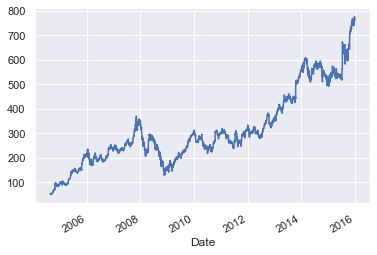

In [13]:
goog.plot()

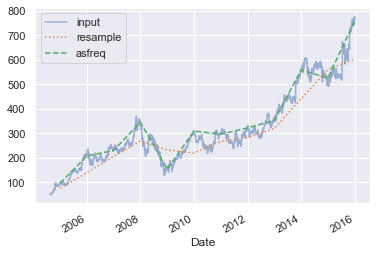

In [17]:
# resample data at end of business year
goog.plot(alpha=0.5, style="-")
goog.resample("BA").mean().plot(style=":") # data aggregation - avg of prev year
goog.asfreq("BA").plot(style="--") # data selection - value at end of year
plt.legend(["input", "resample", "asfreq"], loc="upper left")

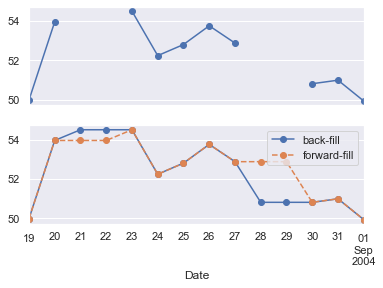

In [25]:
# resample (upsample) at daily freq
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]
data.asfreq("D").plot(ax=ax[0], marker="o")
data.asfreq("D", method="bfill").plot(ax=ax[1], style="-o")
data.asfreq("D", method="ffill").plot(ax=ax[1], style="--o")
ax[1].legend(["back-fill", "forward-fill"], loc="upper right")

#### time shifts

C:\Users\chris\AppData\Local\Temp/ipykernel_12076/1372524688.py:8: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2])


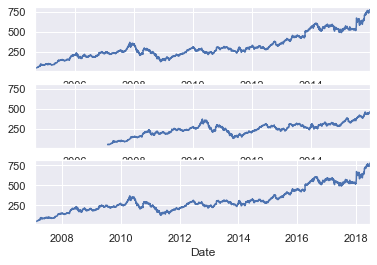

In [28]:
fig, ax = plt.subplots(3, sharey=True)

# apply frequency to data
goog = goog.asfreq("D", method="pad")

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime("2007-11-05")
offset = pd.Timedelta(900, "D")

#### rolling windows

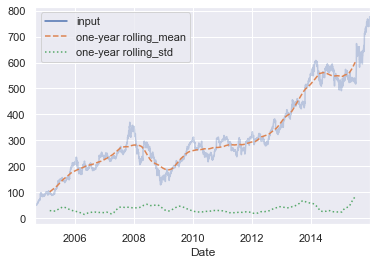

In [32]:
# one year centered rolling mean and std
rolling = goog.rolling(365, center=True) 

# data to plot as df
data = pd.DataFrame({"input":goog,
                    "one-year rolling_mean": rolling.mean() ,
                    "one-year rolling_std": rolling.std()})
# plot
ax = data.plot(style=["-", "--", ":"])

# setting
ax.lines[0].set_alpha(0.3)

## example: visualizing seattle bicycle counts

In [36]:
data = pd.read_csv(r"G:\My Drive\PDSH\PythonDataScienceHandbook-master\notebooks\data\Fremont_Bridge_Bicycle_Counter.csv",
                  index_col="Date", parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [40]:
data.columns = ["Total", "West", "East"]
data.columns

Index(['Total', 'West', 'East'], dtype='object')

In [41]:
data.dropna().describe()

,Total,West,East
count,147255.000000,147255.000000,147255.000000
mean,110.341462,50.077763,60.263699
std,140.422051,64.634038,87.252147
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,145.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


Text(0, 0.5, 'Hourly Bicycle Count')

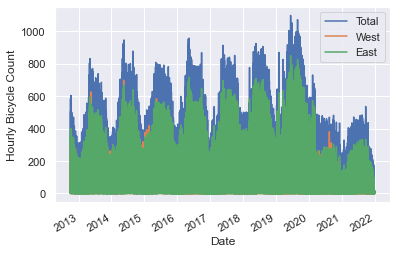

In [43]:
# plotting the raw data
data.plot()
plt.ylabel("Hourly Bicycle Count")

In [ ]:
# data is too dense - resample by week
